In [8]:
#Date:  April 14, 2021
#Name:  Peida Han
#ID:    2449620842
#Email: peidahan@usc.edu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision as tv
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt
import numpy as np

print(torch.cuda.is_available())
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  
device = torch.device(dev)
print(device)

True
cuda:0


In [9]:
def load_data(train_batch_size,test_batch_size):
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,),(0.3081,))])
    
    train_set=tv.datasets.MNIST(
        root='./data/',
        train=True,
        download=True,
        transform=transform
    )
    train_loader=torch.utils.data.DataLoader(
        train_set,
        batch_size=train_batch_size,
        shuffle=True,
        num_workers=2
    )
    
    test_set=tv.datasets.MNIST(
        root='./data/',
        train=False,
        download=True,
        transform=transform
    )
    test_loader=torch.utils.data.DataLoader(
        test_set,
        batch_size=test_batch_size,
        shuffle=False,
        num_workers=2
    )
    print('Data loaded')
    return train_loader,test_loader



In [10]:
def predict(device,cnn,testloader):
    correct=0
    total=0
    with torch.no_grad():
        for i, data in enumerate(testloader):
                inputs,labels=data
                inputs=inputs.to(device)
                labels=labels.to(device)
                labels=labels.float()
                inputs=torch.negative(inputs)

                #batch_size*10
                outputs=cnn(inputs)
                predicted = torch.argmax(outputs, 1)

                corr = (predicted == labels)
                for i in range(labels.size(0)):
                    if corr[i].item():
                        correct=correct+1
                total+=labels.size(0)
    return correct/total      
    

In [11]:
class CNN(nn.Module):

    def __init__(self,channel,size):
        super(CNN, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        self.size=size
        # 5*5 input receptive field
        self.conv1 = nn.Conv2d(channel, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        if self.size==28:
            x=F.pad(x,(2,2,2,2))
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [12]:
#negative digit test set
def main(device):
    train_batch_size=10
    test_batch_size=1000
    trainloader,testloader=load_data(train_batch_size,test_batch_size)
    epochs=30

    PATH='state_dict_model.pt'
    cnn = CNN(channel=1,size=28)
    checkpoint = torch.load(PATH)
    cnn.load_state_dict(checkpoint['model_state_dict'])
    cnn=cnn.to(device)
    test_a=predict(device,cnn,testloader)
    print('test accuary:',test_a)

    return test_a
        

start_time=time.time()
test_acc=main(device)
end_time=(time.time()-start_time)/60
print('total time used:',end_time)

    


Data loaded
test accuary: 0.372
total time used: 0.05013828277587891


In [13]:
cnn = CNN(channel=1,size=28)
for param_tensor in cnn.state_dict():
    print(param_tensor, "\t", cnn.state_dict()[param_tensor].size())


conv1.weight 	 torch.Size([6, 1, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


Data loaded


Text(0.5, 1.0, 'historgram of reversed digit image')

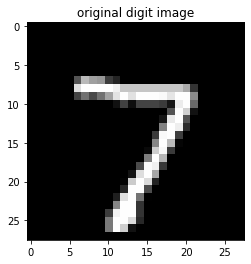

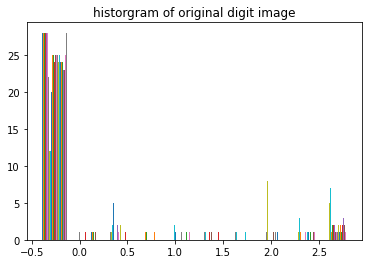

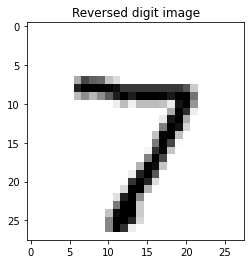

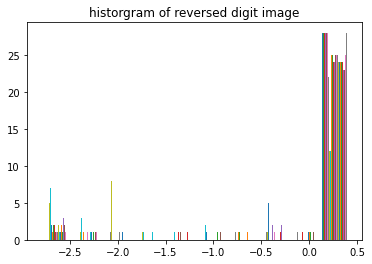

In [40]:
train_batch_size=10
test_batch_size=1000
trainloader,testloader=load_data(train_batch_size,test_batch_size)
sample = iter(testloader)
data,label=next(sample)
data1=np.squeeze(data[0])

plt.figure()
plt.imshow(data1,cmap='gray')
plt.title('original digit image')
plt.figure()
plt.hist(data1)
plt.title('historgram of original digit image')

data=torch.negative(data)
data2=np.squeeze(data[0])
plt.figure()
plt.imshow(data2,cmap='gray')
plt.title('Reversed digit image')
plt.figure()
plt.hist(data2)
plt.title('historgram of reversed digit image')


In [7]:
ReLU=[i-10 if i-10>0 else 0 for i in range(20)]
LeakyReLU=[i-10 if i-10>0 else 0.1*(i-10) for i in range(20)]
ELU=[i-10 if i-10>0 else 1*(np.exp(i-10)-1) for i in range(20)]
common=[i for i in range(10)]
x=[i-10 for i in range(20)]
zeros=[0 for i in range(20)]

Text(0.5, 1.0, 'Activation function comparsion graph')

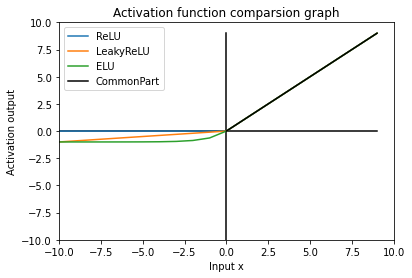

In [8]:
plt.plot(zeros,x,color='black')
plt.plot(x,zeros,color='black')

plt.plot(x,ReLU,label='ReLU')

plt.plot(x,LeakyReLU,label='LeakyReLU')
plt.plot(x,ELU,label='ELU')
plt.plot(common,common,label='CommonPart',color='black')

plt.xlim((-10,10))
plt.ylim((-10,10))
plt.legend()
plt.xlabel('Input x')
plt.ylabel('Activation output')
plt.title('Activation function comparsion graph')